## 任务1：报名比赛，下载比赛数据集并完成读取

- 步骤1 ：登录&报名比赛：https://aistudio.baidu.com/aistudio/competition/detail/45/0/task-definition
- 步骤2 ：下载比赛数据集
- 步骤3 ：使用Pandas完成数据读取。

In [43]:
import numpy as np 
import pandas as pd 
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

In [17]:
bq_corpus_train = pd.read_csv('E:/学习/千言数据集/bq_corpus/bq_corpus/train.tsv',sep='\t',error_bad_lines=False)
bq_corpus_test = pd.read_csv('E:/学习/千言数据集/bq_corpus/bq_corpus/test.tsv',sep='\t',error_bad_lines=False)
bq_corpus_dev = pd.read_csv('E:/学习/千言数据集/bq_corpus/bq_corpus/dev.tsv',sep='\t',error_bad_lines=False)


lcqmc_train = pd.read_csv('E:/学习/千言数据集/lcqmc/lcqmc/train.tsv',sep='\t',error_bad_lines=False)
lcqmc_test = pd.read_csv('E:/学习/千言数据集/lcqmc/lcqmc/test.tsv',sep='\t',error_bad_lines=False)
lcqmc_dev = pd.read_csv('E:/学习/千言数据集/lcqmc/lcqmc/dev.tsv',sep='\t',error_bad_lines=False)

paws_x_zh_train = pd.read_csv('E:/学习/千言数据集/paws-x-zh/paws-x-zh/train.tsv',sep='\t',error_bad_lines=False)
paws_x_zh_test = pd.read_csv('E:/学习/千言数据集/paws-x-zh/paws-x-zh/test.tsv',sep='\t',error_bad_lines=False)
paws_x_zh_dev = pd.read_csv('E:/学习/千言数据集/paws-x-zh/paws-x-zh/dev.tsv',sep='\t',error_bad_lines=False)

bq_corpus_train.head()

b'Skipping line 20746: expected 3 fields, saw 4\nSkipping line 54107: expected 3 fields, saw 4\nSkipping line 65083: expected 3 fields, saw 4\nSkipping line 69869: expected 3 fields, saw 4\n'


,用微信都6年，微信没有微粒贷功能,4。号码来微粒贷,0
0,微信消费算吗,还有多少钱没还,0.0
1,交易密码忘记了找回密码绑定的手机卡也掉了,怎么最近安全老是要改密码呢好麻烦,0.0
2,你好我昨天晚上申请的没有打电话给我今天之内一定会打吗？,什么时候可以到账,0.0
3,"“微粒贷开通""",你好，我的微粒贷怎么没有开通呢,0.0
4,为什么借款后一直没有给我回拨电话,怎么申请借款后没有打电话过来呢！,1.0


## 任务2：对句子对提取TFIDF以及统计特征，训练和预测

参考代码：https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb
- 步骤1 ：对句子对（句子A和句子B统计）如下特征：
    - 句子A包含的字符个数、句子B包含的字符个数
    - 句子A与句子B的编辑距离
    - 句子A与句子B共有单词的个数
    - 句子A与句子B共有字符的个数
    - 句子A与句子B共有单词的个数 / 句子A字符个数
    - 句子A与句子B共有单词的个数 / 句子B字符个数
- 步骤2 ：计算TFIDF，并对句子A和句子B进行特征转换，并进行
- 步骤3 ：计算句子A与句子B的TFIDF向量的内积距离
- 步骤4 ：将上述特征送入分类模型，训练并预测，将结果预测提交到比赛网站。

In [33]:
# 加个列名
def add_columns(df):
    if len(df.columns)==3:
        df.columns =['q1','q2','label']
    else:
        df.columns =['q1','q2']
    return df

add_columns(bq_corpus_train)
add_columns(bq_corpus_test)
add_columns(bq_corpus_dev)

add_columns(lcqmc_train)
add_columns(lcqmc_test)
add_columns(lcqmc_dev)

add_columns(paws_x_zh_train)
add_columns(paws_x_zh_test)
add_columns(paws_x_zh_dev)

,q1,q2,label
0,凯西和她的丈夫皮特·比尔（彼得·迪恩）经济状况稳定。,凯西和她的丈夫彼得·迪恩（皮特·比尔）经济状况稳定。,1
1,Timora diarhoda 是夜蛾科的一种蛾类。它被发现于非洲，包括南非。,Diarhoda 是夜蛾科的一种蛾类。它被发现于南非，包括非洲。,1
2,小乔·R·坎帕是前美国海军水手，曾任美国海军第十一任军士长。,小乔·R·坎帕是前美国海军水手，曾任美国海军第十一任军士长。,1
3,库克池也称为南瓦图帕池，位于劳雷尔湖东南面和汤顿河西面。,库克池之前也称为劳雷尔湖，位于汤顿河东南部和南瓦图帕池西部。,0
4,1972 年，他举家搬至营山，并就读于宾西法尼亚州哈里斯堡的崔尼迪高中。,1972 年，全家搬至希尔营，他在那里参观了宾西法尼亚州哈里斯堡的三一高中。,1
...,...,...,...
1994,李参加过意大利、俄罗斯、希腊、法国、印度尼西亚和希腊的职业比赛。他曾在波多黎各、葡萄牙和印度...,他曾在希腊、俄罗斯、意大利、法国、波多黎各、葡萄牙和印度尼西亚打过职业比赛，并在印度尼西亚和...,0
1995,朗德岛目前无人居住，由美国林务局整体拥有，作为海华沙国家森林的一部分进行管理。,郎德岛目前无人居住，由美国国家森林局全面管理，是海华沙国家森林的一部分。,0
1996,她得到理查德·吉布森和宫廷画师彼得·雷利的称赞，她被公认为成就堪比琼·卡莱尔。,她受到理查德·吉布森和宫廷画家琼·卡莱尔的称赞，被认为像彼得·莱利一样成功。,0
1997,JoyKey 没有活动部件，也没有会破裂的软木塞，或会磨损的羽毛。,JoyKey 没有活动部件，也没有会磨损的软木塞或可能断裂的弹簧。,0


count    172390.000000
mean         13.432571
std         239.884252
min           1.000000
25%           7.000000
50%          10.000000
75%          14.000000
max       51842.000000
dtype: float64
count    19998.000000
mean        11.861186
std          7.183744
min          1.000000
25%          7.000000
50%         10.000000
75%         14.000000
max        100.000000
dtype: float64


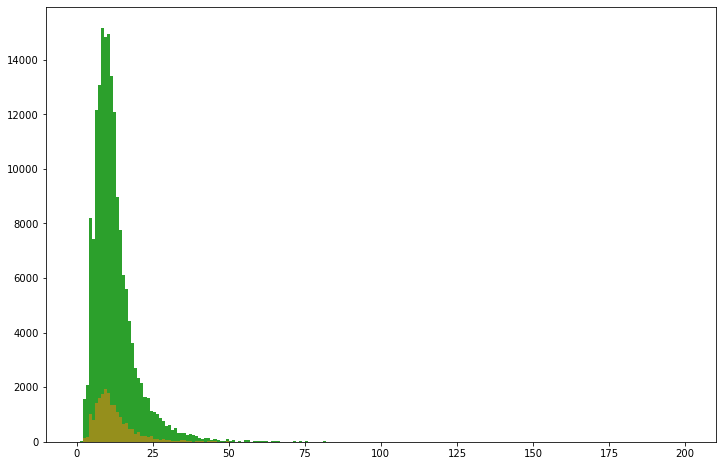

In [55]:
# 字数统计
# 文本长度分布基本一致

train_qs = pd.Series(bq_corpus_train['q1'].tolist()+bq_corpus_train['q2'].to_list())
test_qs = pd.Series(bq_corpus_test['q1'].tolist()+bq_corpus_test['q2'].to_list())

train_len = train_qs.apply(len)
test_len = test_qs.apply(len)

print(train_len.describe())
print(test_len.describe())

plt.figure(figsize=(12, 8))
plt.hist(train_len, bins=200, range=[0, 200], color=pal[2], label='train')
plt.hist(test_len, bins=200, range=[0, 200], color=pal[1], alpha=0.5, label='test')
plt.show();

In [71]:
from collections import Counter
# 所有的字符都是以空格分隔
all_lines = ' '.join(list(bq_corpus_train['q1']))
# 统计每个字符出现的次数
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
word_count[:10]

[('开通', 69),
 ('开通微粒贷', 49),
 ('借款取消', 44),
 ('如何计息', 34),
 ('4:怎么计息', 33),
 ('如何更改手机', 31),
 ('开通借款', 31),
 ('借款后多长时间给打电话', 30),
 ('借款失败', 30),
 ('开通一下', 30)]

In [72]:
# 句子A与句子B共有单词的个数 / 句子A字符个数
bq_corpus_train_q1 = bq_corpus_train['q1'].apply(lambda x:str(x))
bq_corpus_train_q2 = bq_corpus_train['q2'].apply(lambda x:str(x))

words=[]
for n,sentence1 in enumerate(bq_corpus_train_q1):
    for word in sentence1:
        if word in bq_corpus_train_q2[n]:
            words.append(word)
# words
